In [1]:
import csv 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

with open("/home/katherine/Dropbox/sts_ecg/results/explore_on_ecg_metadata/tensors_all_intersect.csv") as f:
    data = pd.read_csv(f)
f.close()

In [2]:
print(data.columns)
feature_cols = ['ecg_rate_md_newest_sts', 'ecg_pr_md_newest_sts',
       'ecg_qrs_md_newest_sts', 'ecg_qt_md_newest_sts',
       'ecg_qtc_md_newest_sts', 'ecg_paxis_md_newest_sts',
       'ecg_raxis_md_newest_sts', 'ecg_taxis_md_newest_sts',
       'ecg_qonset_md_newest_sts', 'ecg_qoffset_md_newest_sts',
       'ecg_ponset_md_newest_sts', 'ecg_poffset_md_newest_sts',
       'ecg_toffset_md_newest_sts', 'ecg_sex_newest_sts female',
       'ecg_sex_newest_sts male', 'ecg_age_newest_sts']

X = data[feature_cols]
y = data['sts_death sts_death']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

Index(['ecg_rate_md_newest_sts', 'ecg_pr_md_newest_sts',
       'ecg_qrs_md_newest_sts', 'ecg_qt_md_newest_sts',
       'ecg_qtc_md_newest_sts', 'ecg_paxis_md_newest_sts',
       'ecg_raxis_md_newest_sts', 'ecg_taxis_md_newest_sts',
       'ecg_qonset_md_newest_sts', 'ecg_qoffset_md_newest_sts',
       'ecg_ponset_md_newest_sts', 'ecg_poffset_md_newest_sts',
       'ecg_toffset_md_newest_sts', 'ecg_sex_newest_sts female',
       'ecg_sex_newest_sts male', 'ecg_age_newest_sts',
       'sts_death no_sts_death', 'sts_death sts_death', 'fpath', 'generator'],
      dtype='object')


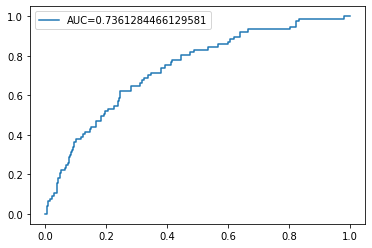

In [9]:
# calculate and plot AUC
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.savefig('/home/katherine/Dropbox/sts_ecg/results/logistic-regression-metadata/AUC.png')
plt.show()

[[ 6.72436146e-02 -4.47188136e-04  4.19254353e-03 -2.11978969e-02
   9.63934454e-03  3.78418509e-03  9.54788104e-04  1.05936151e-03
  -5.82261046e-02 -9.92687381e-03  2.74357339e-06 -4.09309486e-03
   3.46360332e-02  2.51200499e-01 -2.90614763e-01  2.25216404e-02]]


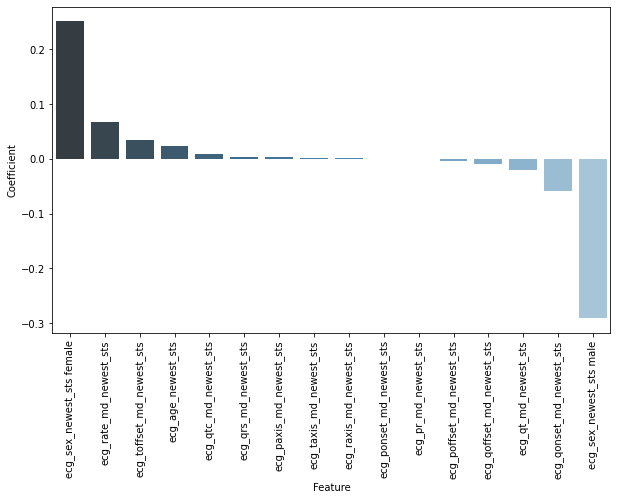

In [6]:
print(lr.coef_)

# plot model coefficients
coeffs = pd.DataFrame({'feature_name': feature_cols, 'model_coefficient': lr.coef_.transpose().flatten()})
coeffs = coeffs.sort_values('model_coefficient',ascending=False)
plt.figure().set_size_inches(10, 6)
fig = sns.barplot(x='feature_name', y='model_coefficient',data=coeffs, palette="Blues_d")
fig.set_xticklabels(rotation=90, labels=coeffs.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.savefig('/home/katherine/Dropbox/sts_ecg/results/logistic-regression-metadata/model-coefficients.png')

# save model coefficients to csv
coeffs.to_csv('/home/katherine/Dropbox/sts_ecg/results/logistic-regression-metadata/model_coefficients.csv', index=False)